In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

from pyspark.ml.linalg import Vectors
from pandas import Series,DataFrame
import pandas as pd

In [2]:
X=[(1,1), (2,2), (3, 3), (10,10), (11,11), (12,12)]

label=[1,1,1,0,0,0]

print(X)
print(label)

[(1, 1), (2, 2), (3, 3), (10, 10), (11, 11), (12, 12)]
[1, 1, 1, 0, 0, 0]


In [3]:
x1 = [a_tuple[0] for a_tuple in X]
x2 = [a_tuple[0] for a_tuple in X]
print(x1)

[1, 2, 3, 10, 11, 12]


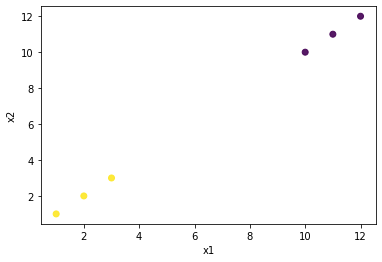

In [7]:
plt.scatter(x1,x2, c=label, alpha=0.9, label="Two Classes")
plt.xlabel("x1")
plt.ylabel("x2")

# plt.legend(loc='lower right')
plt.show()

In [8]:
# Now, let us fit a logistic regression model into this and test it on the train data. 
clf = LogisticRegression(random_state=0).fit(X, label)

print(clf.predict(X))

clf.score(X, label)

[1 1 1 0 0 0]


1.0

In [6]:
# Let us make a RDD in Spark 

# # Now, we create an RDD from this data. 
# # X is a numpy array 
# # y is a simple value lable
